#### sklearn workflow

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [5]:
plt.style.use("seaborn-muted")

##### EDA

In [9]:
df = pd.read_csv("heart-disease.csv") # https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [33]:
df.shape

(303, 14)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [19]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

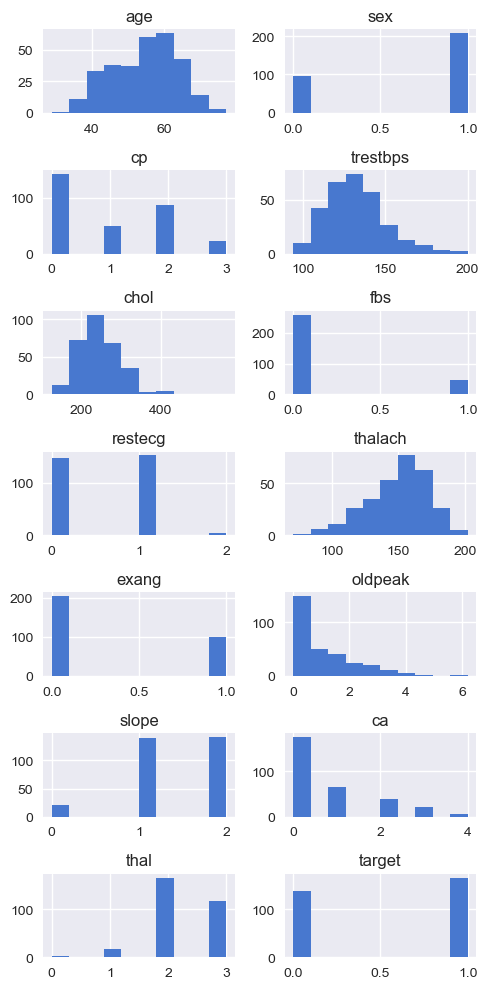

In [25]:
fig, ax = plt.subplots(7, 2, figsize=(5, 10))
ax = ax.flat
for i, j in enumerate(df.columns):
    ax[i].hist(df[j])
    ax[i].set_title(j)
fig.tight_layout()

In [26]:
X = df.drop("target", axis=1)
y = df["target"]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

#### training

In [47]:
from sklearn.svm import LinearSVC

In [48]:
svc_clf = LinearSVC()
svc_clf.fit(X_train, y_train);

D:\Programming\python\machine_learning\ml\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### evaluating

In [49]:
svc_clf.score(X_test, y_test)

0.8032786885245902

#### Tidbid: structured data: used ensemble methods
#### unstructured data: use deep learnng or transfer learning

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
forest_clf.score(X_test, y_test)

0.8688524590163934

In [57]:
y_pred = forest_clf.predict(X_test)
y_pred[:5]

array([0, 1, 1, 0, 1], dtype=int64)

In [56]:
y_pred_proba = forest_clf.predict_proba(X_test)
y_pred_proba[:5]

array([[0.92, 0.08],
       [0.4 , 0.6 ],
       [0.46, 0.54],
       [0.86, 0.14],
       [0.19, 0.81]])

#### Ways to evaluate the model
1. estimator's builtin score method
2. the scoring parameter
3. problem specific metrics

https://scikit-learn.org/stable/modules/model_evaluation.html

In [59]:
forest_clf.score(X_test, y_test)

0.8688524590163934

In [60]:
# cross validation
from sklearn.model_selection import cross_val_score

#### Cross validation scores can help see if your model can generalize well.

In [69]:
cross_val_score(forest_clf, X, y, cv=5) # cv = k folds

array([0.83606557, 0.85245902, 0.80327869, 0.83333333, 0.78333333])

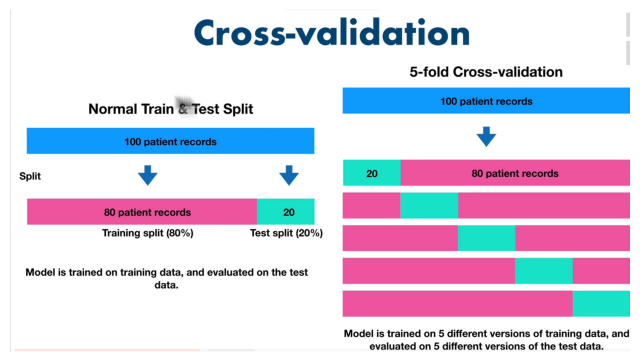

In [73]:
plt.imshow(plt.imread("cross_validation.png"))
plt.grid(False)
plt.xticks([]);plt.yticks([]);

#### Classification model evaluation metrics
1. Accurary
2. Area under ROC curve
3. Confusion matrix
4. Classification report

##### *area under the receiver operating characteristic curve (A.K.A AUC/ROC)*
* A comparison of a model's true positive rate and the model's false positive rate
* true positive: model predicts 1 when the truth is 1
* false positive: model predicts 1 when the truth is 0
* true negative: model predicts 0 when the truth is 0
* false negative: model predicts 0 when the truth is 1

https://www.youtube.com/watch?v=4jRBRDbJemM

In [75]:
from sklearn.metrics import roc_curve

In [81]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, -1])

In [82]:
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate
    and true positive rate of a model
    """

    plt.plot(fpr, tpr, color="orange", label="ROC")
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr/recall)")
    plt.title("Receiver operating characteristic (ROC) curve")
    plt.legend()
    plt.show()

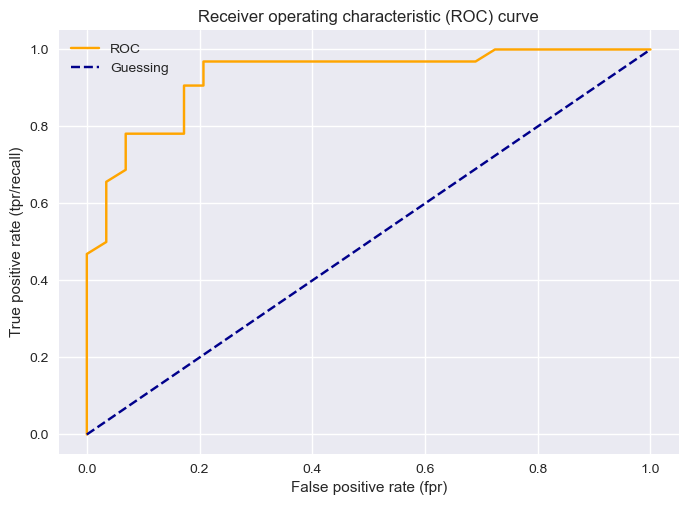

In [83]:
plot_roc_curve(fpr, tpr)

#### *confusion matrix*

In [84]:
from sklearn.metrics import confusion_matrix

In [85]:
confusion_matrix(y_pred, y_test)

array([[24,  3],
       [ 5, 29]], dtype=int64)

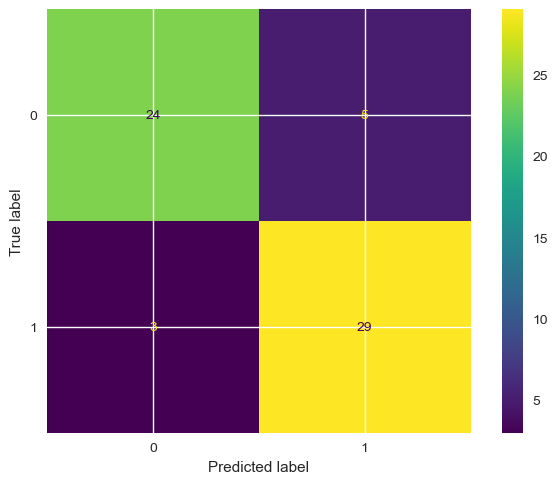

In [88]:
# visualize
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred);

#### Evaulation metrics
1. Accuracy: dividing the number of correct predictions by the total number of predictions
2. Precision: true positives divided by the total number of true positives and false positives (of the predicted positives, the rate of predicted true positives)
3. Recall: true positives divided by the total number of true positives and false negatives (of all the positives, the rate of predicted true positives)
4. F1 score: combines the precision and recall of a classifier into a single metric (by taking their harmonic mean)

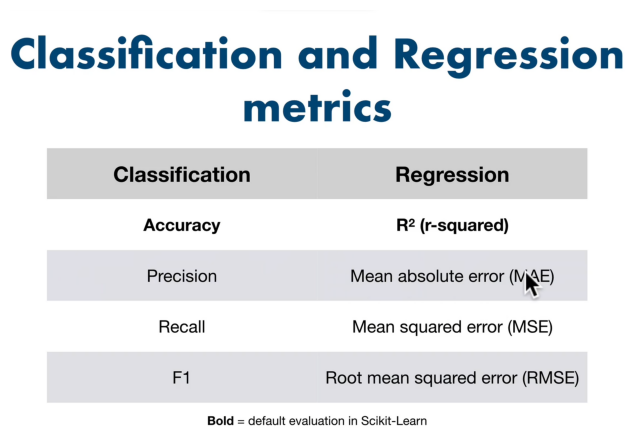

In [90]:
plt.imshow(plt.imread("metrics.png"))
plt.grid(False); plt.xticks([]); plt.yticks([]);

In [92]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



### Improving a model
* First predictions = baseline predictions
* First model = baseline model
##### From a data perspective:
* could we get more data?
* could we improve our current data?

##### From a model perspective:
* is there a better model?
* could we improve the model (e.g. hyperparameters)?

#### Hyperparameter tuning!

In [94]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [98]:
clf = RandomForestClassifier()
# P.S. learn more about random forests in this statquest https://www.youtube.com/watch?v=J4Wdy0Wc_xQ

In [97]:
clf.get_params() # returns tunable hyperparameters of model

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [99]:
# evaluation auxiliary function
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
def evaluate(y_true, y_pred):
    """
    evaluate and returns metrics for a model, given y true and y pred
    y_true: array of actual values
    y_pred: array of predicted values
    """
    a = accuracy_score(y_true, y_pred)
    p = precision_score(y_true, y_pred)
    r = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    info = {"accuracy": round(a, 2), "precision": round(p, 2), "recall": round(r, 2), "f1": round(f1, 2)}
    return info

##### Always tune hyperparameters on train and val, and then test on test set

In [103]:
df = df.sample(frac=1)
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.15)

In [104]:
len(X_train), len(X_val), len(y_val)

(212, 77, 77)

In [107]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
baseline_metrics = evaluate(y_val, y_pred)
baseline_metrics

{'accuracy': 0.82, 'precision': 0.79, 'recall': 0.84, 'f1': 0.82}

In [109]:
clf2 = RandomForestClassifier(n_estimators=100, max_depth=1)
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_val)
clf2_metrics = evaluate(y_val, y_pred2)
clf2_metrics

{'accuracy': 0.84, 'precision': 0.77, 'recall': 0.97, 'f1': 0.86}

#### Hand tuning is inefficient

In [116]:
from sklearn.model_selection import RandomizedSearchCV # CV means cross validation
from sklearn.model_selection import train_test_split

grid = {
    "n_estimators": [10, 100, 200, 500, 1000, 1200],
    "max_depth": [None, 5, 10, 20, 30],
    "max_features": ["sqrt"],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1, 2, 4]
}

clf3 = RandomForestClassifier()
rscv_clf = RandomizedSearchCV(clf3, grid, n_iter=15)

In [117]:
rscv_clf.fit(X_train, y_train);

In [119]:
rscv_clf.best_params_

{'n_estimators': 1200,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 5}

In [121]:
rscv_clf_pred = rscv_clf.predict(X_test)
rscv_metrics = evaluate(y_test, rscv_clf_pred)
rscv_metrics

{'accuracy': 0.79, 'precision': 0.71, 'recall': 0.83, 'f1': 0.77}

In [123]:
from sklearn.model_selection import GridSearchCV # CV means cross validation
from sklearn.model_selection import train_test_split

grid = {
    "n_estimators": [100, 200, 500],
    "max_depth": [None],
    "max_features": ["sqrt"],
    "min_samples_split": [6],
    "min_samples_leaf": [1, 2]
}

clf4 = RandomForestClassifier()
grid_clf = GridSearchCV(clf3, grid)
grid_clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]})

In [124]:
grid_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 500}

In [126]:
grid_pred = grid_clf.predict(X_test)
grid_metrics = evaluate(y_test, grid_pred)
grid_metrics

{'accuracy': 0.79, 'precision': 0.71, 'recall': 0.83, 'f1': 0.77}

In [129]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics, "clf2": clf2_metrics, "rs": rscv_metrics, "gs": grid_metrics})

In [130]:
compare_metrics

,baseline,clf2,rs,gs
accuracy,0.82,0.84,0.79,0.79
precision,0.79,0.77,0.71,0.71
recall,0.84,0.97,0.83,0.83
f1,0.82,0.86,0.77,0.77


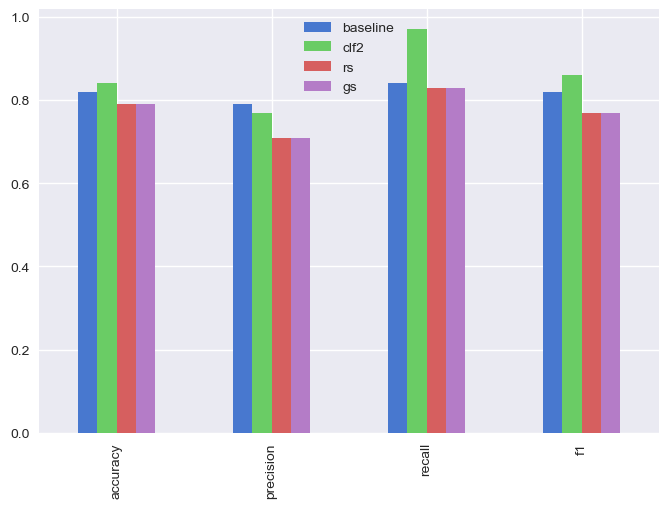

In [132]:
compare_metrics.plot.bar();

### Saving and loading models
1. with `pickle`
2. with `joblib`

In [133]:
import pickle
pickle.dump(clf2, open("clf2.pkl", "wb"))

In [134]:
loaded_model = pickle.load(open("clf2.pkl", "rb"))